# PR5 - NOBEL PRIZE WINNERS

# The most Nobel of Prizes


The Nobel Prize is perhaps the world's most well known scientific award. Except for the honor, prestige and substantial prize money the recipient also gets a gold medal showing Alfred Nobel (1833 - 1896) who established the prize. Every year it's given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. The first Nobel Prize was handed out in 1901, and at that time the Prize was very Eurocentric and male-focused, but nowadays it's not biased in any way whatsoever. Surely. Right?

Well, we're going to find out! The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2019. Let's load it in and take a look.

In [52]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Reading in the Nobel Prize data
nobel = pd.read_csv('/Users/ligandrosy/Downloads/complete.csv')

# Taking a look at the first several winners
nobel.head(n=2)

,awardYear,category,categoryFullName,sortOrder,portion,prizeAmount,prizeAmountAdjusted,dateAwarded,prizeStatus,motivation,...,org_founded_country,org_founded_countryNow,org_founded_locationString,ind_or_org,residence_1,residence_2,affiliation_1,affiliation_2,affiliation_3,affiliation_4
0,2001,Economic Sciences,The Sveriges Riksbank Prize in Economic Scienc...,2,1/3,10000000,12295082,2001-10-10,received,for their analyses of markets with asymmetric ...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Stanford University, Stanford, CA, USA",NaN,NaN,NaN
1,1975,Physics,The Nobel Prize in Physics,1,1/3,630000,3404179,1975-10-17,received,for the discovery of the connection between co...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Niels Bohr Institute, Copenhagen, Denmark",NaN,NaN,NaN


In [53]:
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   awardYear                   950 non-null    int64 
 1   category                    950 non-null    object
 2   categoryFullName            950 non-null    object
 3   sortOrder                   950 non-null    int64 
 4   portion                     950 non-null    object
 5   prizeAmount                 950 non-null    int64 
 6   prizeAmountAdjusted         950 non-null    int64 
 7   dateAwarded                 533 non-null    object
 8   prizeStatus                 950 non-null    object
 9   motivation                  950 non-null    object
 10  categoryTopMotivation       20 non-null     object
 11  award_link                  950 non-null    object
 12  id                          950 non-null    int64 
 13  name                        950 non-null    object

# So, who gets the Nobel Prize?
Just looking at the first couple of prize winners, or Nobel laureates as they are also called, we already see a celebrity: Wilhelm Conrad Röntgen, the guy who discovered X-rays. And actually, we see that all of the winners in 1901 were guys that came from Europe. But that was back in 1901, looking at all winners in the dataset, from 1901 to 2019, which sex and which country is the most commonly represented?

(For birth, we will use the birth_country of the winner, as the organization_country is NaN for all shared Nobel Prizes.)

In [54]:
# Display the number of (possibly shared) Nobel Prizes handed
# out between 1901 and 2016
display(len(nobel))

# Display the number of prizes won by male and female recipients.
display(nobel['gender'].value_counts())

# Display the number of prizes won by the top 10 nationalities.
nobel['birth_country'].value_counts().head(10)

950

male      869
female     54
Name: gender, dtype: int64

USA                274
United Kingdom      87
Germany             77
France              53
Sweden              29
Japan               27
Canada              20
Switzerland         19
the Netherlands     18
Russia              17
Name: birth_country, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

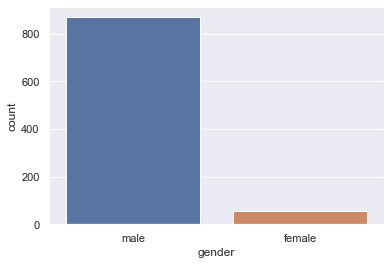

In [55]:
sns.countplot(x=nobel['gender'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


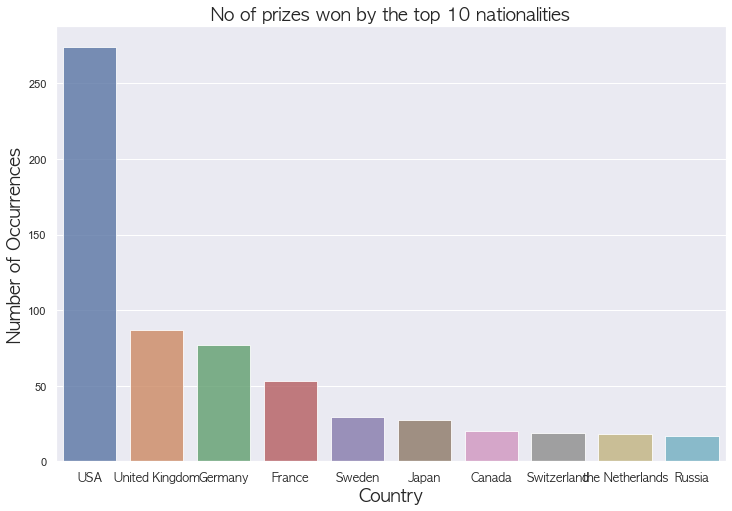

In [56]:
fig ,ax = plt.subplots(figsize=(12,8))
# -- Clean up the axes
country_count  = nobel['birth_country'].value_counts()
country_count = country_count[:10,]
sns.barplot(country_count.index, country_count.values, alpha=0.8)
plt.title('No of prizes won by the top 10 nationalities',font="AppleGothic",size=18)
plt.ylabel('Number of Occurrences', font="AppleGothic",size=18)
plt.xlabel('Country', font="AppleGothic",size=18)
plt.xticks(font="AppleGothic",size=12)
plt.show()

## USA dominance
Not so surprising perhaps: the most common Nobel laureate between 1901 and 2016 was a man born in the United States of America. But in 1901 all the winners were European. When did the USA start to dominate the Nobel Prize charts?

In [57]:
# Calculating the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel['birth_country']=='USA'
nobel['decade'] = (np.floor(nobel['awardYear']/10)*10).astype(int)
prop_usa_winners = nobel.groupby(['decade'], as_index=False)['usa_born_winner'].mean()

# Display the proportions of USA born winners per decade
display(prop_usa_winners)

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


## USA dominance, visualized
A table is OK, but to see when the USA started to dominate the Nobel charts we need a plot!

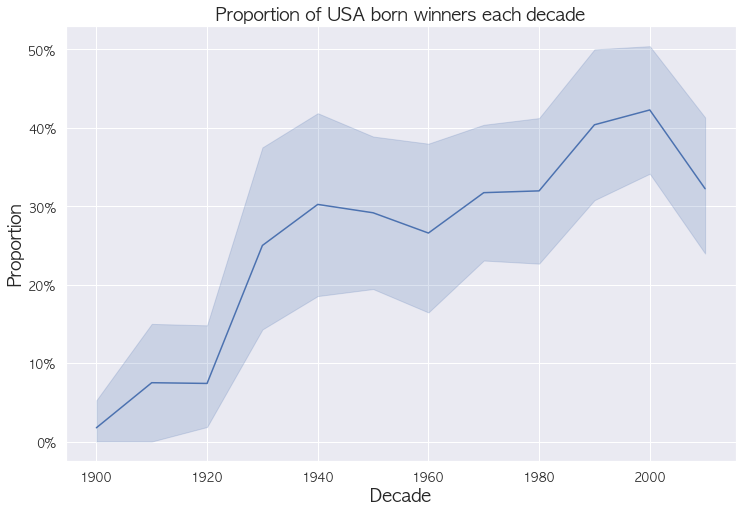

In [58]:
# Setting the plotting theme
sns.set()
fig ,ax = plt.subplots(figsize=(12,8))


# Plotting USA born winners 
ax = sns.lineplot(x='decade', y='usa_born_winner', data=nobel)
plt.title('Proportion of USA born winners each decade',font="AppleGothic",size=18)
plt.ylabel('Proportion', font="AppleGothic",size=18)
plt.xlabel('Decade', font="AppleGothic",size=18)
plt.xticks(font="AppleGothic",size=12)
plt.yticks(font="AppleGothic",size=12)
# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

## What is the gender of a typical Nobel Prize winner?
So the USA became the dominating winner of the Nobel Prize first in the 1930s and had kept the leading position ever since. But one group that was in the lead from the start, and never seems to let go, are men. Maybe it shouldn't come as a shock that there is some imbalance between how many male and female prize winners there are, but how significant is this imbalance? And is it better or worse within specific prize categories like physics, medicine, literature, etc.?

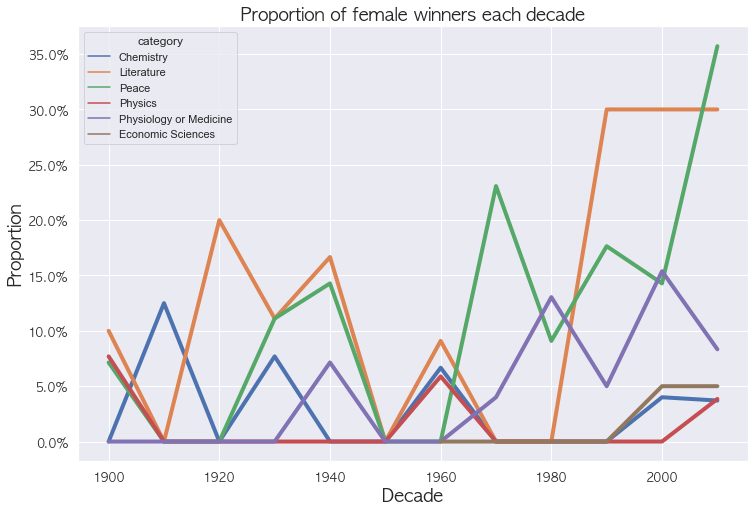

In [59]:
sns.set()
fig ,ax = plt.subplots(figsize=(12,8))

# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel['gender']=='female'
prop_female_winners = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()
prop_female_winners
# Plotting USA born winners with % winners on the y-axis
ax = sns.lineplot(x='decade', y='female_winner', hue='category', data=prop_female_winners,linewidth = 4)
plt.title('Proportion of female winners each decade',font="AppleGothic",size=18)
plt.ylabel('Proportion', font="AppleGothic",size=18)
plt.xlabel('Decade', font="AppleGothic",size=18)
plt.xticks(font="AppleGothic",size=12)
plt.yticks(font="AppleGothic",size=12)
# Adding %-formatting to the y-axis
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

## The first woman to win the Nobel Prize
The plot above is a bit messy as the lines are overplotting. But it does show some interesting trends and patterns. Overall the imbalance is pretty large with physics, economics, and chemistry having the largest imbalance. Medicine has a somewhat positive trend, and since the 1990s the literature prize is also now more balanced. The big outlier is the peace prize during the 2010s, but keep in mind that this just covers the years 2010 to 2019.

Given this imbalance, who was the first woman to receive a Nobel Prize? And in what category?

In [60]:
# Picking out the first woman to win a Nobel Prize
x = nobel[nobel['female_winner']==True].nsmallest(1,'awardYear')
x["name"]

566    Marie Curie
Name: name, dtype: object

## Repeat laureates
For most scientists/writers/activists a Nobel Prize would be the crowning achievement of a long career. But for some people, one is just not enough, and few have gotten it more than once. Who are these lucky few? (Having won no Nobel Prize myself, I'll assume it's just about luck.)

In [61]:
# Selecting the laureates that have received 2 or more prizes.
nobel.groupby('name').filter(lambda x: len(x)>1)



,awardYear,category,categoryFullName,sortOrder,portion,prizeAmount,prizeAmountAdjusted,dateAwarded,prizeStatus,motivation,...,ind_or_org,residence_1,residence_2,affiliation_1,affiliation_2,affiliation_3,affiliation_4,usa_born_winner,decade,female_winner
264,1958,Chemistry,The Nobel Prize in Chemistry,1,1,214559,2646698,NaN,received,"for his work on the structure of proteins, esp...",...,Individual,NaN,NaN,"University of Cambridge, Cambridge, United Kin...",NaN,NaN,NaN,False,1950,False
391,1917,Peace,The Nobel Peace Prize,1,1,133823,3920596,1917-12-10,received,for the efforts to take care of wounded soldie...,...,Organization,NaN,NaN,NaN,NaN,NaN,NaN,False,1910,False
457,1956,Physics,The Nobel Prize in Physics,2,1/3,200123,2699501,NaN,received,for their researches on semiconductors and the...,...,Individual,NaN,NaN,"University of Illinois, Urbana, IL, USA",NaN,NaN,NaN,True,1950,False
544,1962,Peace,The Nobel Peace Prize,1,1,257220,2836985,1963-10-10,received,for his fight against the nuclear arms race be...,...,Individual,NaN,NaN,"California Institute of Technology (Caltech), ...",NaN,NaN,NaN,True,1960,False
566,1903,Physics,The Nobel Prize in Physics,3,1/4,141358,7795478,NaN,received,in recognition of the extraordinary services t...,...,Individual,NaN,NaN,NaN,NaN,NaN,NaN,False,1900,True
634,1954,Peace,The Nobel Peace Prize,1,1,181647,2640218,1955-11-05,received,for its efforts to heal the wounds of war by p...,...,Organization,NaN,NaN,NaN,NaN,NaN,NaN,False,1950,False
943,1980,Chemistry,The Nobel Prize in Chemistry,3,1/4,880000,2889667,1980-10-14,received,for their contributions concerning the determi...,...,Individual,NaN,NaN,"MRC Laboratory of Molecular Biology, Cambridge...",NaN,NaN,NaN,False,1980,False
944,1944,Peace,The Nobel Peace Prize,1,1,121841,2510460,1945-11-12,received,for the great work it has performed during the...,...,Organization,NaN,NaN,NaN,NaN,NaN,NaN,False,1940,False
945,1972,Physics,The Nobel Prize in Physics,1,1/3,480000,3345725,NaN,received,for their jointly developed theory of supercon...,...,Individual,NaN,NaN,"University of Illinois, Urbana, IL, USA",NaN,NaN,NaN,True,1970,False
946,1954,Chemistry,The Nobel Prize in Chemistry,1,1,181647,2640218,NaN,received,for his research into the nature of the chemic...,...,Individual,NaN,NaN,"California Institute of Technology (Caltech), ...",NaN,NaN,NaN,True,1950,False


## How old are you when you get the prize?
The list of repeat winners contains some illustrious names! We again meet Marie Curie, who got the prize in physics for discovering radiation and in chemistry for isolating radium and polonium. John Bardeen got it twice in physics for transistors and superconductivity, Frederick Sanger got it twice in chemistry, and Linus Carl Pauling got it first in chemistry and later in peace for his work in promoting nuclear disarmament. We also learn that organizations also get the prize as both the Red Cross and the UNHCR have gotten it twice.

But how old are you generally when you get the prize?

In [62]:
nobel["birth_date"].dtype

dtype('O')

In [80]:
# Convert single column to int dtype.
nobel["birth_date"] = nobel["birth_date"].astype('string')

In [81]:
nobel["birth_date"]

0      1943-00-00
1      1922-06-19
2      1947-10-01
3      1926-08-11
4      1926-01-29
          ...    
945    1908-05-23
946    1901-02-28
947    1867-11-07
948          <NA>
949          <NA>
Name: birth_date, Length: 950, dtype: string

In [86]:
df = nobel.dropna(subset = ["birth_date"])

In [87]:
df

,awardYear,category,categoryFullName,sortOrder,portion,prizeAmount,prizeAmountAdjusted,dateAwarded,prizeStatus,motivation,...,residence_2,affiliation_1,affiliation_2,affiliation_3,affiliation_4,usa_born_winner,decade,female_winner,bd,age
0,2001,Economic Sciences,The Sveriges Riksbank Prize in Economic Scienc...,2,1/3,10000000,12295082,2001-10-10,received,for their analyses of markets with asymmetric ...,...,NaN,"Stanford University, Stanford, CA, USA",NaN,NaN,NaN,True,2000,False,1943,58
1,1975,Physics,The Nobel Prize in Physics,1,1/3,630000,3404179,1975-10-17,received,for the discovery of the connection between co...,...,NaN,"Niels Bohr Institute, Copenhagen, Denmark",NaN,NaN,NaN,False,1970,False,1922,53
2,2004,Chemistry,The Nobel Prize in Chemistry,1,1/3,10000000,11762861,2004-10-06,received,for the discovery of ubiquitin-mediated protei...,...,NaN,"Technion - Israel Institute of Technology, Hai...",NaN,NaN,NaN,False,2000,False,1947,57
3,1982,Chemistry,The Nobel Prize in Chemistry,1,1,1150000,3102518,1982-10-18,received,for his development of crystallographic electr...,...,NaN,"MRC Laboratory of Molecular Biology, Cambridge...",NaN,NaN,NaN,False,1980,False,1926,56
4,1979,Physics,The Nobel Prize in Physics,2,1/3,800000,2988048,1979-10-15,received,for their contributions to the theory of the u...,...,NaN,"International Centre for Theoretical Physics, ...","Imperial College, London, United Kingdom",NaN,NaN,False,1970,False,1926,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,2000,Physics,The Nobel Prize in Physics,1,1/4,9000000,11333109,2000-10-10,received,for developing semiconductor heterostructures ...,...,NaN,"A.F. Ioffe Physico-Technical Institute, St. Pe...",NaN,NaN,NaN,False,2000,False,1930,70
943,1980,Chemistry,The Nobel Prize in Chemistry,3,1/4,880000,2889667,1980-10-14,received,for their contributions concerning the determi...,...,NaN,"MRC Laboratory of Molecular Biology, Cambridge...",NaN,NaN,NaN,False,1980,False,1918,62
945,1972,Physics,The Nobel Prize in Physics,1,1/3,480000,3345725,NaN,received,for their jointly developed theory of supercon...,...,NaN,"University of Illinois, Urbana, IL, USA",NaN,NaN,NaN,True,1970,False,1908,64
946,1954,Chemistry,The Nobel Prize in Chemistry,1,1,181647,2640218,NaN,received,for his research into the nature of the chemic...,...,NaN,"California Institute of Technology (Caltech), ...",NaN,NaN,NaN,True,1950,False,1901,53


In [88]:
df['bd'] = df['birth_date'].str[:4]

/var/folders/y9/7jjg2kks2396zw687mh2t7vc0000gn/T/ipykernel_911/3331900303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bd'] = df['birth_date'].str[:4]


/var/folders/y9/7jjg2kks2396zw687mh2t7vc0000gn/T/ipykernel_911/4075491101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bd'] =df['bd'].astype(int)
/var/folders/y9/7jjg2kks2396zw687mh2t7vc0000gn/T/ipykernel_911/4075491101.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['awardYear'] - df['bd']


(array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.]),
 [Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60'),
  Text(0, 70.0, '70'),
  Text(0, 80.0, '80'),
  Text(0, 90.0, '90'),
  Text(0, 100.0, '100'),
  Text(0, 110.0, '110')])

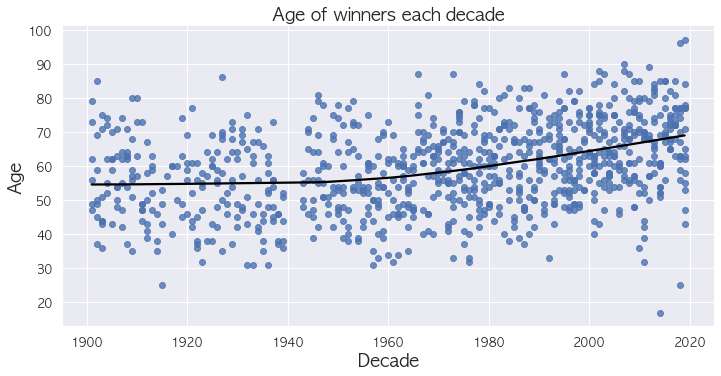

In [98]:
df['bd'] =df['bd'].astype(int)

df['age'] = df['awardYear'] - df['bd']
sns.lmplot(x='awardYear', y='age', data=df, lowess=True, aspect=2, line_kws={'color':'black'})


plt.title('Age of winners each decade',font="AppleGothic",size=18)
plt.ylabel('Age', font="AppleGothic",size=18)
plt.xlabel('Decade', font="AppleGothic",size=18)
plt.xticks(font="AppleGothic",size=12)
plt.yticks(font="AppleGothic",size=12)

# Age differences between prize categories
The plot above shows us a lot! We see that people use to be around 55 when they received the price, but nowadays the average is closer to 65. But there is a large spread in the laureates' ages, and while most are 50+, some are very young.

We also see that the density of points is much high nowadays than in the early 1900s -- nowadays many more of the prizes are shared, and so there are many more winners. We also see that there was a disruption in awarded prizes around the Second World War (1939 - 1945).

Let's look at age trends within different prize categories.



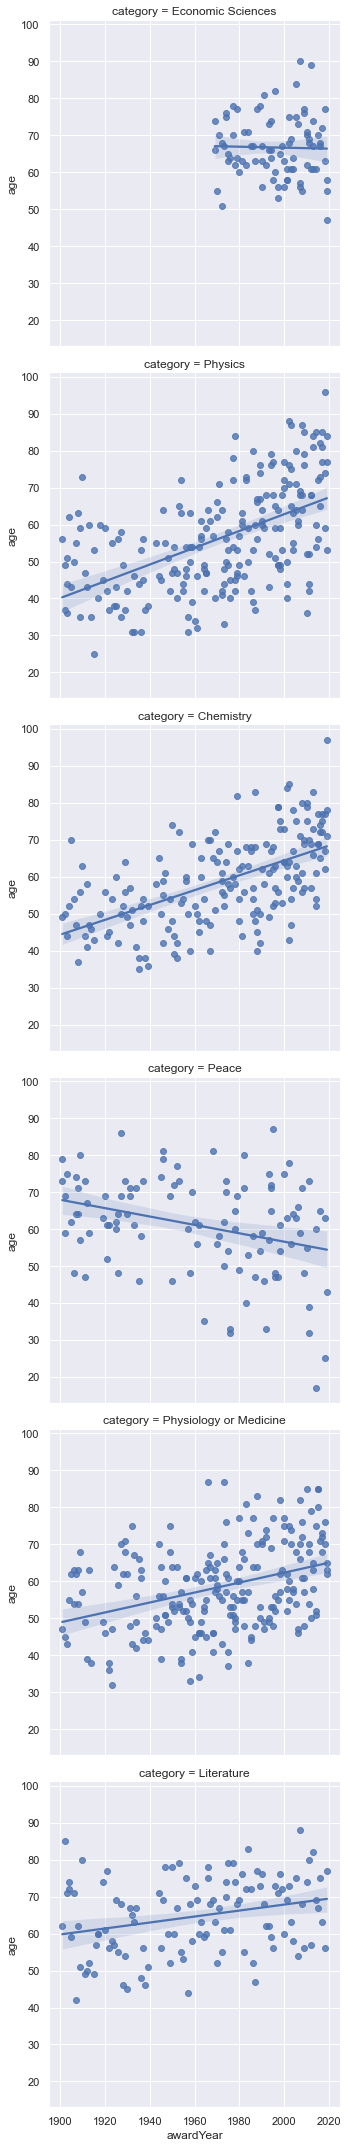

In [105]:
# Same plot as above, but separate plots for each type of Nobel Prize

sns.lmplot(x='awardYear', y='age', data= df, row='category')


# Oldest and youngest winners
More plots with lots of exciting stuff going on! We see that both winners of the chemistry, medicine, and physics prize have gotten older over time. The trend is strongest for physics: the average age used to be below 50, and now it's almost 70. Literature and economics are more stable. We also see that economics is a newer category. But peace shows an opposite trend where winners are getting younger!

In the peace category we also a winner around 2010 that seems exceptionally young. This begs the questions, who are the oldest and youngest people ever to have won a Nobel Prize?

In [106]:
# The oldest winner of a Nobel Prize as of 2016
display(df.nlargest(1, 'age'))

# The youngest winner of a Nobel Prize as of 2016
df.nsmallest(1, 'age')

,awardYear,category,categoryFullName,sortOrder,portion,prizeAmount,prizeAmountAdjusted,dateAwarded,prizeStatus,motivation,...,residence_2,affiliation_1,affiliation_2,affiliation_3,affiliation_4,usa_born_winner,decade,female_winner,bd,age
456,2019,Chemistry,The Nobel Prize in Chemistry,1,1/3,9000000,9000000,2019-10-09,received,for the development of lithium-ion batteries,...,NaN,"University of Texas, Austin, TX, USA",NaN,NaN,NaN,False,2010,False,1922,97


,awardYear,category,categoryFullName,sortOrder,portion,prizeAmount,prizeAmountAdjusted,dateAwarded,prizeStatus,motivation,...,residence_2,affiliation_1,affiliation_2,affiliation_3,affiliation_4,usa_born_winner,decade,female_winner,bd,age
562,2014,Peace,The Nobel Peace Prize,2,1/2,8000000,8379888,2014-10-10,received,for their struggle against the suppression of ...,...,NaN,NaN,NaN,NaN,NaN,False,2010,True,1997,17


# You get a prize!


Hey! You get a prize for making it to the very end of this notebook! It might not be a Nobel Prize, but I made it myself in paint so it should count for something. But don't despair, Leonid Hurwicz was 90 years old when he got his prize, so it might not be too late for you. Who knows.

Before you leave, what was again the name of the youngest winner ever who in 2014 got the prize for "[her] struggle against the suppression of children and young people and for the right of all children to education"?

In [107]:
# The name of the youngest winner of the Nobel Prize as of 2016
youngest_winner = 'Malala Yousafzai'